In [3]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# K-Means Clustering
This work is based on Mubaris' great work (
https://mubaris.com/2017/10/01/kmeans-clustering-in-python/).

A description of the algorithm can be found:
https://github.com/andrewxiechina/DataScience/blob/master/K-Means/cs229-notes7a%202.pdf

![](https://github.com/andrewxiechina/DataScience/blob/master/K-Means/k4XcapI.gif?raw=true)

# Generate Random Data
Generate random data normally distributed around 3 centers, with a noise.

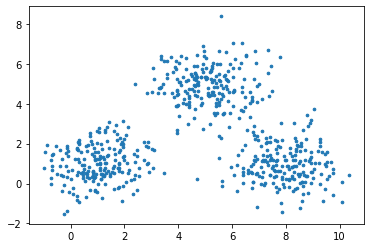

In [4]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

# Create K-Means Algorithm
Generate random data normally distributed around 3 centers, with a noise.

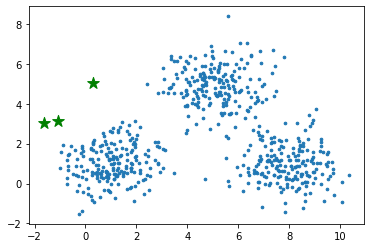

In [5]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Генерация случайных центров, здесь мы используем сигму и среднее значение, чтобы гарантировать, что она представляет все данные
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [6]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

array([[ 6.39978457,  2.96165343],
       [ 1.06529898,  0.93869322],
       [-0.6764229 , -0.12164608]])

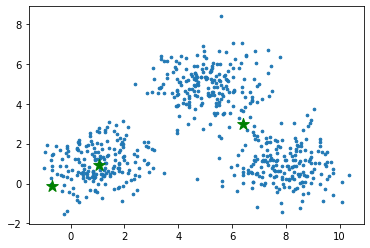

In [7]:
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

# Test on Iris Dataset

In [8]:
df = pd.read_csv("IRIS.csv") #load the dataset

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Change categorical data to number 0-2
df["species"] = pd.Categorical(df["species"])
df["species"] = df["species"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 0:4]
category = df.values[:, 4]

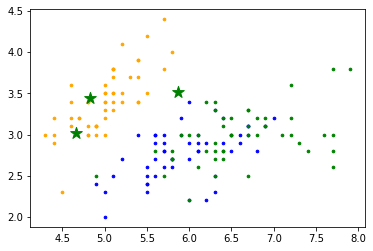

In [17]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [18]:
centers

array([[4.8276626 , 3.44261809, 4.18763516, 0.60960401],
       [4.65706706, 3.0178105 , 3.29133385, 0.84978248],
       [5.86613272, 3.51625391, 4.45921658, 0.8504251 ]])

In [19]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# Когда после обновления оценка этого центра остается прежней, выходим из цикла
while error != 0:
    # Измерение расстояния до каждого центра
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Назначение тренировочных данных к ближайшему центру
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Вычислить среднее значение для каждого кластера и обновить центр
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new

array([[4.9       , 2.5       , 4.5       , 1.7       ],
       [5.055     , 3.25666667, 1.81333333, 0.39      ],
       [6.38539326, 2.92359551, 5.06179775, 1.73820225]])

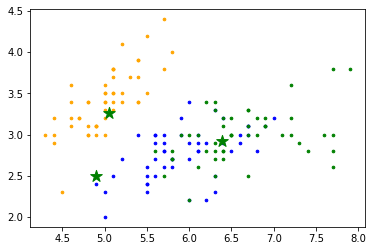

In [20]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

# Давайте протестируем sklearn

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, category, test_size=0.2, random_state = 42)

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

kmeans = KMeans(n_clusters=3, random_state=0).fit(x_train)
y_pred = kmeans.predict(x_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        40
         1.0       0.00      0.00      0.00        41
         2.0       0.90      0.67      0.76        39

    accuracy                           0.22       120
   macro avg       0.30      0.22      0.25       120
weighted avg       0.29      0.22      0.25       120

